# **Imports**

In [1]:
import os
os.chdir(os.path.expanduser("~/PycharmProjects/vivarium-ecoli"))

In [2]:
import argparse
import numpy as np
import pathlib, datetime
import pandas as pd
import math
import seaborn as sns

# vivarium-core imports
import pytest
from vivarium.core.engine import Engine
from vivarium.core.composer import Composer
from vivarium.library.dict_utils import deep_merge

# vivarium-ecoli imports
from ecoli.experiments.ecoli_master_sim import EcoliSim, CONFIG_DIR_PATH
from ecoli.library.sim_data import LoadSimData
from ecoli.states.wcecoli_state import get_state_from_file
from ecoli.composites.ecoli_master import SIM_DATA_PATH
from ecoli.processes.registries import topology_registry

# **Parameters**

In [3]:
filename='default'
total_time=10
divide=True
initial_state_file='vivecoli_t2'
progress_bar=True
log_updates=False
emitter='timeseries'

In [4]:
sim = EcoliSim.from_file(CONFIG_DIR_PATH + filename + '.json')
sim.total_time = total_time
sim.raw_output = False
sim.divide = divide
sim.progress_bar = progress_bar
sim.log_updates = log_updates
sim.emitter = emitter
sim.initial_state = get_state_from_file(path=f'data/{initial_state_file}.json')

In [5]:
sim.build_ecoli()

In [6]:
sim.processes

{'ecoli-chromosome-structure': ecoli.processes.chromosome_structure.ChromosomeStructure,
 'ecoli-metabolism': ecoli.processes.metabolism.Metabolism,
 'ecoli-tf-binding': ecoli.processes.tf_binding.TfBinding,
 'ecoli-transcript-initiation': ecoli.processes.transcript_initiation.TranscriptInitiation,
 'ecoli-transcript-elongation': ecoli.processes.transcript_elongation.TranscriptElongation,
 'ecoli-rna-degradation': ecoli.processes.rna_degradation.RnaDegradation,
 'ecoli-polypeptide-initiation': ecoli.processes.polypeptide_initiation.PolypeptideInitiation,
 'ecoli-polypeptide-elongation': ecoli.processes.polypeptide_elongation.PolypeptideElongation,
 'ecoli-complexation': ecoli.processes.complexation.Complexation,
 'ecoli-two-component-system': ecoli.processes.two_component_system.TwoComponentSystem,
 'ecoli-equilibrium': ecoli.processes.equilibrium.Equilibrium,
 'ecoli-protein-degradation': ecoli.processes.protein_degradation.ProteinDegradation,
 'ecoli-chromosome-replication': ecoli.pr

# **Run Simulation**

In [7]:
sim.run()


Simulation ID: 33328874-5f95-11ed-a39b-acde48001122
Created: 11/08/2022 at 10:43:17
Progress:|██████████████████████████████████████████████████| 0.0/10.0 simulated seconds remaining    
Completed in 18.89 seconds


# **Query Output**

In [8]:
folderName = input("Enter the output Folder Path. If prefer default, press ENTER:")

if folderName == "":
    folder = f'out/geneRxnVerifData'
else:
    folder = f'{folderName}'

Enter the output Folder Path. If prefer default, press ENTER: 


# *Enter Query Parameters*

In [9]:
query = []
agents = sim.query()['agents'].keys()
for agent in agents:
    query.extend([('agents', agent, 'listeners', 'fba_results'),
                  ('agents', agent, 'bulk'), ('agents', agent, 'listeners', 'mass')])
output = sim.query(query)

pathlib.Path(folder).mkdir(parents=True, exist_ok=True)

# *Visualize Output*

## Basic Visualization

In [10]:
all_masses = output['agents']['0']['listeners']['mass']
all_masses = pd.DataFrame(all_masses)

In [11]:
all_masses

,cell_mass,dry_mass,water_mass,rnaMass,rRnaMass,tRnaMass,mRnaMass,dnaMass,proteinMass,smallMoleculeMass,...,smallMoleculeFoldChange,projection_mass,cytosol_mass,extracellular_mass,flagellum_mass,membrane_mass,outer_membrane_mass,periplasm_mass,pilus_mass,inner_membrane_mass
0,1170.397036,351.119077,819.277958,50.722351,41.145928,7.363780,1.966114,6.645941,162.085938,131.664847,...,1.000000,1.073390,1106.882915,2.973489,0.0,4.534407,11.079628,25.117234,0.024604,14.148163
1,1170.397036,351.106952,819.290084,50.754930,41.171078,7.367007,1.978304,6.649897,162.159778,131.542347,...,0.999070,1.073621,1106.856473,2.975714,0.0,4.537542,11.083848,25.122565,0.024604,14.154579
2,1170.563620,351.218901,819.344719,50.780476,41.200455,7.371176,1.980837,6.653852,162.240316,131.544257,...,0.999084,1.073812,1106.983144,2.976871,0.0,4.539576,11.088645,25.128810,0.024637,14.162492
3,1170.733247,351.329201,819.404046,50.807931,41.218703,7.375165,1.985122,6.657807,162.318436,131.545027,...,0.999090,1.074299,1107.116571,2.977790,0.0,4.540987,11.092831,25.133722,0.024637,14.168942
4,1170.918535,351.451682,819.466853,50.832087,41.234595,7.380147,1.985084,6.661763,162.396954,131.560878,...,0.999210,1.074505,1107.263416,2.979904,0.0,4.543112,11.097689,25.142378,0.024637,14.175742
5,1171.102115,351.571508,819.530606,50.858384,41.250197,7.384144,1.987756,6.665718,162.472931,131.574475,...,0.999314,1.074718,1107.414902,2.981097,0.0,4.545639,11.102122,25.149933,0.024689,14.181844


### Masses to be visualized contained in array below

In [12]:
collect = ['cell_mass', 'dry_mass', 'dnaMass', 'proteinMass', 'water_mass', 'smallMoleculeMass']

In [13]:
masses = all_masses.loc[:,collect]

In [14]:
for i, name in enumerate(collect):
    maxVal = max(list(masses[name]))
    masses[name] = masses[name].div(maxVal)

In [15]:
masses

,cell_mass,dry_mass,dnaMass,proteinMass,water_mass,smallMoleculeMass
0,0.999398,0.998713,0.997033,0.997618,0.999692,1.000000
1,0.999398,0.998679,0.997626,0.998073,0.999707,0.999070
2,0.999540,0.998997,0.998220,0.998568,0.999773,0.999084
3,0.999685,0.999311,0.998813,0.999049,0.999846,0.999090
4,0.999843,0.999659,0.999407,0.999532,0.999922,0.999210
5,1.000000,1.000000,1.000000,1.000000,1.000000,0.999314


<AxesSubplot:>

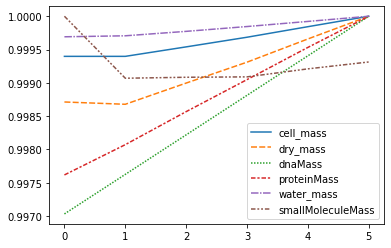

In [16]:
sns.lineplot(data=masses)

### For more advanced visualization, utilize other notebooks